In [13]:
from utils import read_data, preprocess
import random
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE

RANDOM_SEED = 42

def set_random_seed(seed: int):
    # 设置 Python 的随机种子
    random.seed(seed)
    
    # 设置 NumPy 的随机种子
    np.random.seed(seed)
    
    # 设置 PyTorch 的随机种子
    torch.manual_seed(seed)
    
    # 如果使用 GPU，设置 CUDA 的随机种子
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # 如果使用多个 GPU
    
    # 设置 cudnn 的确定性操作（提高可重复性）
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False  # 关闭非确定性算法的加速（可以影响性能）
    
set_random_seed(RANDOM_SEED)



In [4]:
data = read_data()
data = preprocess(data)
data.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.051434,2.706375,0.984984,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.786070,2.121559,0.788827,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.626390,-0.005028,0.457611,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.255342,1.437358,0.702003,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.582163,1.501184,-0.635724,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
class MyDataset(Dataset):
    def __init__(self, dataframe, label_column=None):
        super().__init__()
        self.dataframe = dataframe
        self.label_column = label_column
        
        # 如果有标签列，将标签分开
        if label_column:
            self.features = dataframe.drop(columns=[label_column]).values
            self.labels = dataframe[label_column].values
        else:
            self.features = dataframe.values
            self.labels = None

    def __len__(self):
        # 返回数据集的大小
        return len(self.dataframe)

    def __getitem__(self, idx):

        # 获取索引为 idx 的数据
        feature = self.features[idx]
        
        # 如果有标签列，返回标签
        if self.labels is not None:
            label = self.labels[idx]
            sample = torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.int64)
        else:
            sample = torch.tensor(feature, dtype=torch.float32)
        
        return sample

X, y = data.drop('stroke', axis=1), data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)
oversample = SMOTE(sampling_strategy='auto', random_state=RANDOM_SEED)
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_SEED)

train_df = pd.concat((X_train, y_train), axis=1)
valid_df = pd.concat((X_valid, y_valid), axis=1)
test_df = pd.concat((X_test, y_test), axis=1)


train_data = MyDataset(train_df, label_column='stroke')
valid_data = MyDataset(valid_df, label_column='stroke')
test_data = MyDataset(test_df, label_column='stroke')

Exception in thread Thread-26:
Traceback (most recent call last):
  File "c:\Users\62687\anaconda3\envs\rrl\lib\threading.py", line 950, in _bootstrap_inner
    self.run()
  File "c:\Users\62687\anaconda3\envs\rrl\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\62687\anaconda3\envs\rrl\lib\threading.py", line 888, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\62687\anaconda3\envs\rrl\lib\subprocess.py", line 1475, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\62687\anaconda3\envs\rrl\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 27: invalid start byte
c:\Users\62687\anaconda3\envs\rrl\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
list index out of rang

In [6]:
for X, y in train_data:
    print(f'type of X: {type(X)}, X: {X.shape}')
    print(f'type of y: {type(y)}, y: {y.shape}')
    break

type of X: <class 'torch.Tensor'>, X: torch.Size([16])
type of y: <class 'torch.Tensor'>, y: torch.Size([])



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\62687\anaconda3\envs\rrl\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\62687\anaconda3\envs\rrl\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\62687\anaconda3\envs\rrl\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\62687\anaconda3\envs\rrl\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c

# 建立模型

In [19]:
net = nn.Sequential(nn.Linear(16, 256), nn.ReLU(), nn.Dropout(.1),
                    nn.Linear(256, 128), nn.ReLU(), nn.Dropout(.1), 
                    nn.Linear(128, 64), nn.ReLU(), nn.Dropout(.1),
                    nn.Linear(64, 2))

X = torch.rand(64, 16)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Linear output shape:	 torch.Size([64, 256])
ReLU output shape:	 torch.Size([64, 256])
Dropout output shape:	 torch.Size([64, 256])
Linear output shape:	 torch.Size([64, 128])
ReLU output shape:	 torch.Size([64, 128])
Dropout output shape:	 torch.Size([64, 128])
Linear output shape:	 torch.Size([64, 64])
ReLU output shape:	 torch.Size([64, 64])
Dropout output shape:	 torch.Size([64, 64])
Linear output shape:	 torch.Size([64, 2])


# 训练

In [8]:
import test
from tqdm import tqdm

class Accumulator():
    def __init__(self, n):
        self.data = [0.] * n
    def add(self, *args):
        self.data = [a + b for a, b in zip(self.data, args)]
    def __getitem__(self, idx):
        return self.data[idx]
    
def accuracy(y_hat, y):
    cmp = y_hat.argmax(dim=1) == y
    return cmp.sum()
def get_test_acc(net, valid_iter, device):
    metric = Accumulator(2)
    # accurate num; total num
    for X, y in valid_iter:
        X, y = X.to(device), y.to(device)
        y_hat = net(X)
        metric.add(accuracy(y_hat, y), X.shape[0])
    return metric[0] / metric[1]

def train(net, train_iter, valid_iter, lr, num_epochs, wd, device=torch.device(f'cuda:{0}')):
    def init_weight(layer):
        if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)
            nn.init.constant_(layer.bias, 0)
    net.apply(init_weight)
    net = net.to(device)
    print('training on', device)

    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    best_acc, best_epoch = 0, 0
    for epoch in tqdm(range(num_epochs)):
        net.train()
        metric = Accumulator(3)
        # total loss; accurate num; total num
        # for X, y in tqdm(train_iter):
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], accuracy(y_hat, y), X.shape[0])
        
        net.eval()
        with torch.no_grad():    
            test_acc = get_test_acc(net, valid_iter, device)
            if test_acc > best_acc:
                best_acc, best_epoch = test_acc, epoch

        # print(f'epoch {epoch + 1}\n loss: {metric[0] / metric[2]:.3f}, train acc: {metric[1] / metric[2]:.3f}, test acc: {test_acc:.3f}')
    print(f'best epoch {best_epoch + 1}\n best test acc: {best_acc:.3f}')

In [20]:
lr, wd, num_epochs, batch_size = 0.005, 1e-3, 300, 128
train_iter = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_iter = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
train(net, train_iter, valid_iter, lr, num_epochs, wd)

training on cuda:0


  0%|          | 0/300 [00:00<?, ?it/s]C:\Users\62687\AppData\Local\Temp\ipykernel_32436\2145306133.py:27: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  sample = torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.int64)
100%|██████████| 300/300 [00:33<00:00,  8.91it/s]

best epoch 262
 best test acc: 0.979


# 预测

test set accuracy: 89.95%
test set f1 score: 12.50%
test set auc score: 53.55%


C:\Users\62687\AppData\Local\Temp\ipykernel_32436\2145306133.py:27: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  sample = torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.int64)


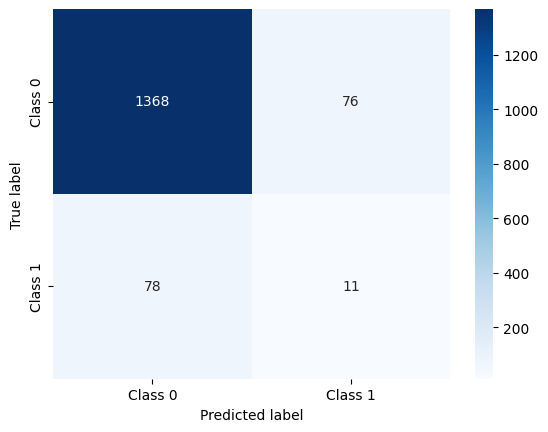

In [21]:
test_iter = DataLoader(test_data, batch_size=batch_size, shuffle=True)
y_pred = []
y_true = []
for X, y in test_iter:
    net.eval()
    y_pred += net(X.to(torch.device(f'cuda:{0}'))).cpu().detach().argmax(dim=1).tolist()
    y_true += y.tolist()
y_pred = np.array(y_pred)
y_true = np.array(y_true)
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)
print(f'test set accuracy: {acc*100:.2f}%')
print(f'test set f1 score: {f1*100:.2f}%')
print(f'test set auc score: {auc*100:.2f}%')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()